<a href="https://colab.research.google.com/github/nanduyenni01/iris-flower-classification/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#mount google drive
from google.colab import files
uploaded=files.upload()

Saving IRIS.csv to IRIS.csv


In [3]:
#load dataset
import numpy as np
iris_data = pd.read_csv('IRIS.csv')
print(iris_data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

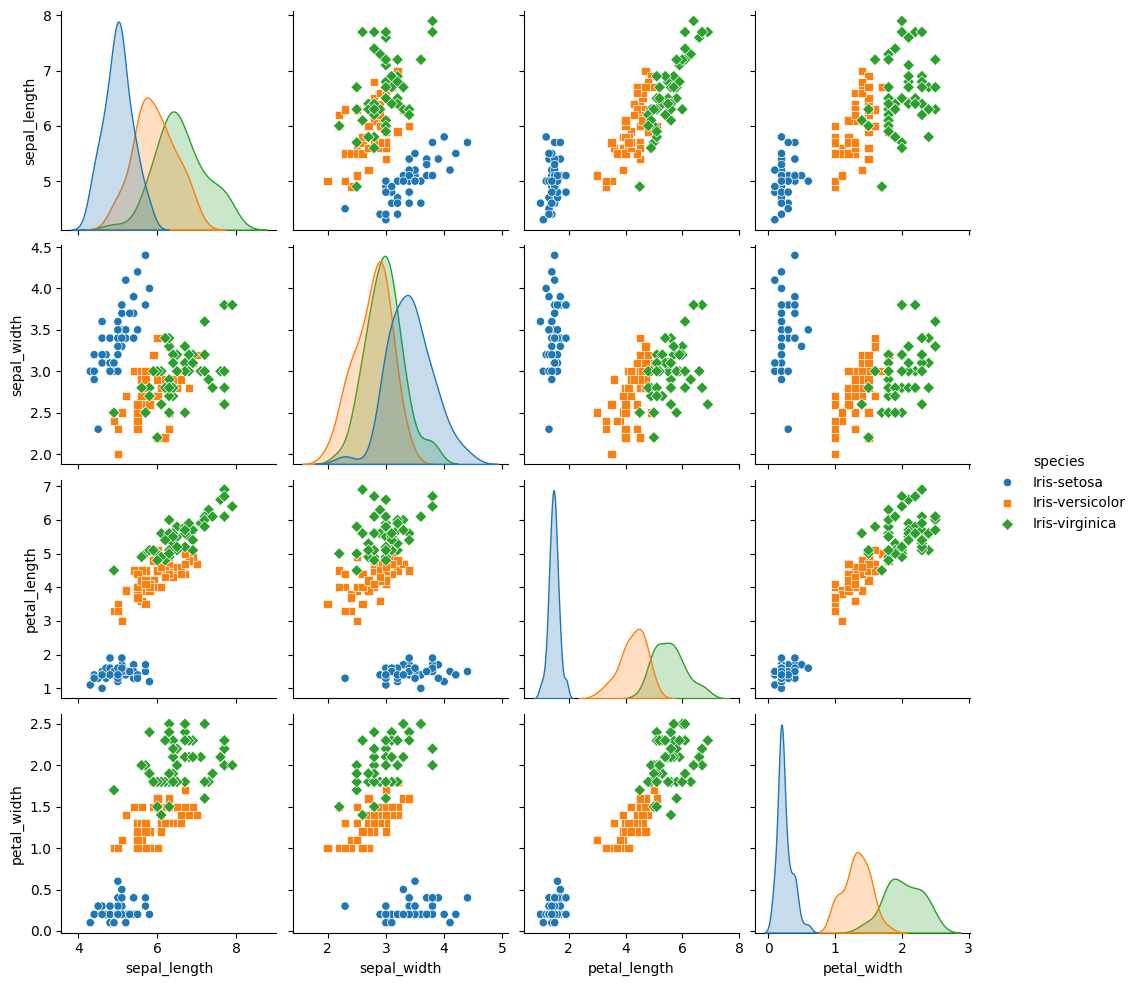

In [4]:
#Basic Exploration
print(iris_data.info())
print(iris_data.describe())
sns.pairplot(iris_data,hue='species',markers=["o","s","D"])
plt.show()

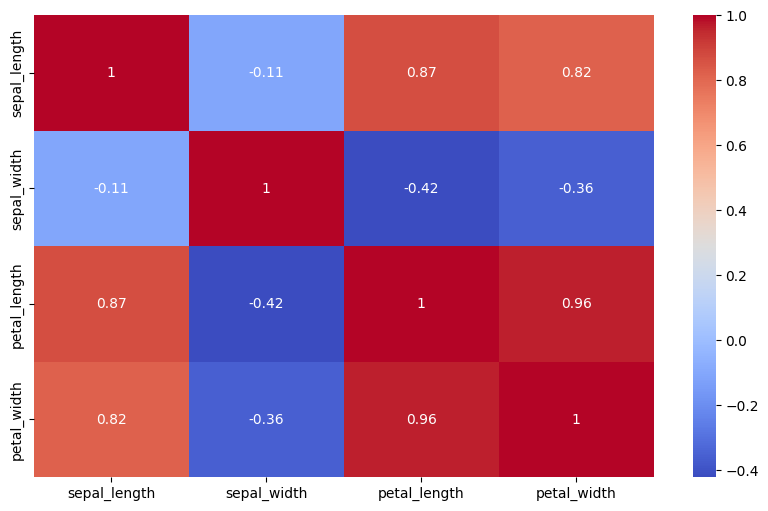

In [5]:
#visualize the data
numeric_columns=iris_data.select_dtypes(include=[np.number])
correlation_matrix=numeric_columns.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

In [6]:
#data preprocessing
x=iris_data.drop(columns=['species']).values
y=iris_data['species'].values
x_train ,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [7]:
#building the model
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [8]:
#making prediction
y_pred=knn.predict(x_test)

In [9]:
#Evaluating model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


Length of error list: 39
Range of k values:39
Accuracy with optimal K: 1.0


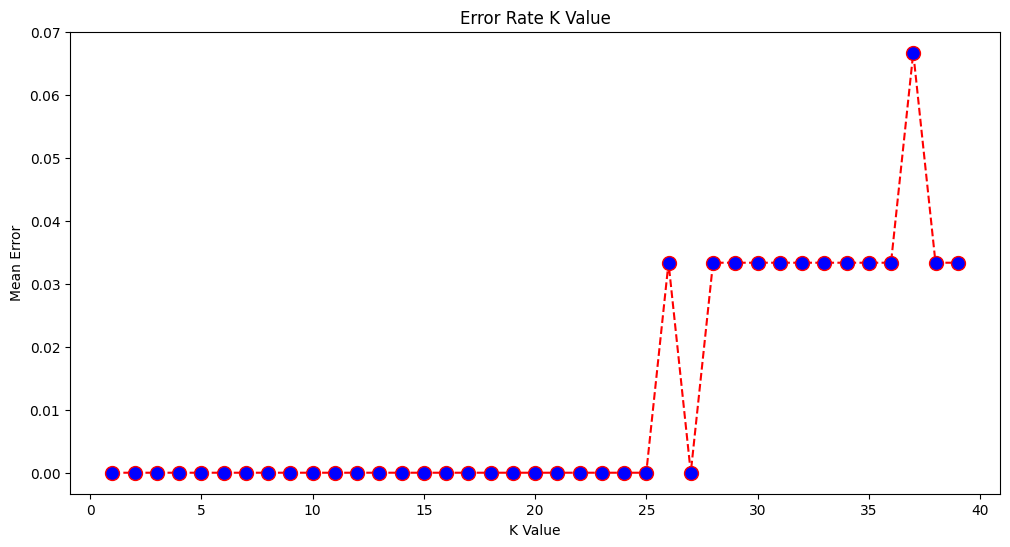

In [10]:
#fine-tuning the model
error=[]
for i in range(1, 40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error.append(np.mean(pred_i !=y_test))
print(f"Length of error list: {len(error)}")
print(f"Range of k values:{len(range(1,40))}")
#plot the error rate vs k value
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40),error, color='red',linestyle='dashed', marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
#Retain with optimal k
optimal_k=error.index(min(error))+1
knn=KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Accuracy with optimal K:",accuracy_score(y_test,y_pred))